<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn import metrics
#from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
#from imblearn.over_sampling import RandomOverSampler ,SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline

In [ ]:
df=pd.read_csv("c:\dataset\diabetes.csv")
df
X=df.iloc[:,:8]
y=df['Outcome']
X=StandardScaler().fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

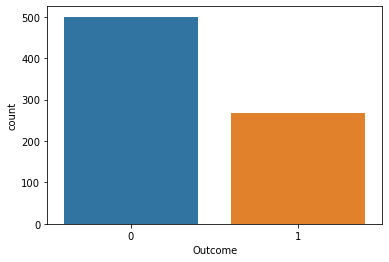

In [ ]:
print(df['Outcome'].value_counts(normalize=True))
sns.countplot(df['Outcome'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=70)

In [ ]:
#k fold validation
model=DecisionTreeClassifier()
kfold=StratifiedKFold(n_splits=10,random_state=20)
num_tress=100
model=model.fit(x_train,y_train)
#with prob > .5 or <0.5 as 1  0
trainscore=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=kfold)
testscore=cross_val_score(model,x_test,y_test,scoring='accuracy',cv=kfold)
origdatascore=cross_val_score(model,X,y,scoring='accuracy',cv=kfold)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print('trainscore mean',trainscore.mean())
print('test mean',testscore.mean())
print('original data mean',origdatascore.mean())

trainscore mean 0.7095015576323987
test mean 0.6964847363552267
original data mean 0.7175621763857057


In [ ]:
#bagging and DTree
bg=BaggingClassifier(model,n_estimators=100,random_state=55).fit(x_train,y_train)
results=cross_val_score(bg,x_train,y_train,cv=kfold)
print('bagging accuracy score',results.mean())

NameError: name 'BaggingClassifier' is not defined

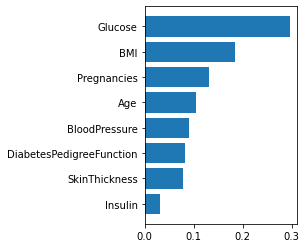

[0.13146592 0.29613805 0.09146672 0.07834144 0.03166797 0.18426319
 0.08161703 0.10503968]
[4 3 6 2 7 0 5 1]


In [ ]:
imp_feature=model.feature_importances_
#imp_feature=100*(imp_feature/imp_feature.max())
sorted_idx=np.argsort(imp_feature)
pos=np.arange(sorted_idx.shape[0])+0.5
pos
plt.subplot(1,2,2)
plt.barh(pos,imp_feature[sorted_idx],align='center')
plt.yticks(pos,df.columns[sorted_idx])
plt.show()
print(imp_feature)
print(sorted_idx)

In [ ]:
clf1=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
y_pred=clf1.predict(x_test)
results=cross_val_score(clf1,x_train,y_train,cv=kfold)
score=accuracy_score(y_test,y_pred)
score
results.mean()

0.7580712788259959